#Desafío Alura
En este notebook se llevara a cabo la resolución del reto propuesto por Alura, el cual dice:

Durante este desafío, ayudarás al Sr. Juan a decidir qué tienda de su cadena Alura Store debe vender para iniciar un nuevo emprendimiento. Para ello, analizarás datos de ventas, rendimiento y reseñas de las 4 tiendas de Alura Store. El objetivo es identificar la tienda menos eficiente y presentar una recomendación final basada en los datos.

####Lo que practicarás:
* Cargue y manipule datos CSV con la biblioteca Pandas.

* Cree visualizaciones de datos con la biblioteca Matplotlib.

* Analice métricas como ingresos, reseñas y rendimiento de ventas.

####Requisitos:
#####Analizar datos de la tienda:

* Debes evaluar información como los ingresos, las categorías más vendidas, las reseñas de los clientes, los productos más vendidos y el envío promedio.



#####Crear gráficos para visualización:

* Decide qué tipos de gráficos utilizar para presentar los resultados de forma clara y visual.

* Mínimo de 3 gráficos diferentes, que pueden incluir gráficos de barras, circulares, de dispersión y otros.



####Enviar una recomendación:

* Después del análisis, escriba un texto explicando a qué tienda debería vender el Sr. João y por qué, basándose en los datos presentados.

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


##Unimos todos los datos de las tiendas para trabajar con un solo dataset
Como se observó que los datasets de las tiendas compartían la misma estructura, se decidió unirlas en un solo dataset, y para identificarlas, se les creó su propio ID y luego si se unieron, esto ayudará a que hacer el análisis sea más sencillo.

In [2]:
tiendas = [tienda1, tienda2, tienda3, tienda4]

for i in range(len(tiendas)):
    print(f"tienda {i+1}: {tiendas[i].columns}")

tienda 1: Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
tienda 2: Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
tienda 3: Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
tienda 4: Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')


##Visualizar filas del dataset
Revisamos las primeras filas del dataset y ademas revisamos que cantidad de filas tiene cada tienda.

In [3]:
tienda1['tienda_id'] = 1
tienda2['tienda_id'] = 2
tienda3['tienda_id'] = 3
tienda4['tienda_id'] = 4

df = pd.concat([tienda1, tienda2, tienda3, tienda4])
df.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda_id
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,1


In [4]:
df.groupby('tienda_id').size()

,0
tienda_id,
1,2359
2,2359
3,2359
4,2358


##Análisis del dataset

In [5]:
#Información general de dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9435 entries, 0 to 2357
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  tienda_id               9435 non-null   int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 1.3+ MB


In [6]:
fs=df.shape
print('formato original : {}'.format(fs))

df = df.drop_duplicates()

ns= df.shape
print('Existen {} duplicados'.format((fs[0])-(ns[0])))
print('nuevo formato : {}'.format(ns))

formato original : (9435, 13)
Existen 0 duplicados
nuevo formato : (9435, 13)


In [7]:
#Métricas de variables cuantitativas
df.describe()

,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon,tienda_id
count,9.435000e+03,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000
mean,4.667323e+05,24875.145734,4.014520,2.927398,5.428909,-74.760108,2.499841
std,5.903207e+05,31480.036346,1.390518,2.802776,2.355663,1.207155,1.118046
min,7.600000e+03,0.000000,1.000000,1.000000,-4.215280,-77.281110,1.000000
25%,5.520000e+04,3000.000000,3.000000,1.000000,4.609710,-75.563590,1.500000
50%,2.215000e+05,11700.000000,5.000000,1.000000,4.609710,-74.199040,2.000000
75%,6.633000e+05,34900.000000,5.000000,4.000000,6.251840,-74.081750,3.000000
max,2.977000e+06,162500.000000,5.000000,24.000000,11.544440,-67.923900,4.000000


In [8]:
#Métricas de variables cualitativas o texto
df.describe(include='object')

,Producto,Categoría del Producto,Fecha de Compra,Vendedor,Lugar de Compra,Método de pago
count,9435,9435,9435,9435,9435,9435
unique,51,8,1185,14,19,4
top,Mesa de noche,Muebles,06/02/2020,Izabela de León,Bogotá,Tarjeta de crédito
freq,210,1886,18,744,3943,6898


In [9]:
#Número de valores únicos en cada columna
df.nunique()

,0
Producto,51
Categoría del Producto,8
Precio,5483
Costo de envío,1204
Fecha de Compra,1185
Vendedor,14
Lugar de Compra,19
Calificación,5
Método de pago,4
Cantidad de cuotas,19


In [10]:
#Suma de valores nulos por columna
df.isnull().sum()

,0
Producto,0
Categoría del Producto,0
Precio,0
Costo de envío,0
Fecha de Compra,0
Vendedor,0
Lugar de Compra,0
Calificación,0
Método de pago,0
Cantidad de cuotas,0


# Formateamos las variables a su formato correcto y agregamos nuevas variables

Lo que hago aquí es cambiar el tienda_id a formato str para que no tenga problemas al graficar no es un problema grande y lo podría dejar en número y no existiría problema, además de esto formatee la columna de fechas al formato de date, y cree nuevas características como lo es el mes y año que servirán para posteriores análisis.

In [11]:
df['tienda_id'] = df['tienda_id'].astype(str)

In [12]:
df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'])
df['Mes'] = df['Fecha de Compra'].dt.month
df['Año'] = df['Fecha de Compra'].dt.year

#Como tengo la locación o región en ingles si uso el dt.month_name() me daría los nombres en ingles a lo cual decidí mejor hacer el diccionario y mapearlo con el número de mes
meses = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
}
df['Mes_Nombre'] = df['Fecha de Compra'].dt.month.map(meses)
df.head()

<ipython-input-12-2a4ebf6fcfb2>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'])


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda_id,Mes,Año,Mes_Nombre
0,Asistente virtual,Electrónicos,164300.0,6900.0,2021-01-16,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,1,1,2021,Enero
1,Mesa de comedor,Muebles,192300.0,8400.0,2022-05-18,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,1,5,2022,Mayo
2,Juego de mesa,Juguetes,209600.0,15900.0,2021-03-15,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,1,3,2021,Marzo
3,Microondas,Electrodomésticos,757500.0,41000.0,2022-05-03,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,1,5,2022,Mayo
4,Silla de oficina,Muebles,335200.0,20200.0,2020-11-07,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,1,11,2020,Noviembre


In [13]:
df['Año'].value_counts()

,count
Año,
2021,2982
2022,2873
2020,2861
2023,719


In [14]:
analsis2023= df[df['Año'] == 2023]
analsis2023['Mes_Nombre'].value_counts()

,count
Mes_Nombre,
Marzo,267
Febrero,236
Enero,216


In [15]:
df['mes_año'] = df['Fecha de Compra'].dt.strftime('%b-%Y')
df.sample()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda_id,Mes,Año,Mes_Nombre,mes_año
1851,Smart TV,Electrónicos,1301700.0,67500.0,2021-09-18,Juan Fernandez,Bogotá,5,Nequi,1,4.60971,-74.08175,3,9,2021,Septiembre,Sep-2021


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9435 entries, 0 to 2357
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Producto                9435 non-null   object        
 1   Categoría del Producto  9435 non-null   object        
 2   Precio                  9435 non-null   float64       
 3   Costo de envío          9435 non-null   float64       
 4   Fecha de Compra         9435 non-null   datetime64[ns]
 5   Vendedor                9435 non-null   object        
 6   Lugar de Compra         9435 non-null   object        
 7   Calificación            9435 non-null   int64         
 8   Método de pago          9435 non-null   object        
 9   Cantidad de cuotas      9435 non-null   int64         
 10  lat                     9435 non-null   float64       
 11  lon                     9435 non-null   float64       
 12  tienda_id               9435 non-null   object       

#1. Análisis de facturación



1. Como se puede observar la tienda 1 genero 1.150.880.400 y fue la que mas ingresos genero.
2. Luego tenemos la tienda 2 con 1.116.343.500 y fue la segunda que mas ingresos obtuvo
3. En cuanto a la tienda 3 genero 1.098.019.600 y fue la tercera que mas vendio.
4. Por último tenemos a la tienda 4 que generó 1.038.375.700 y fúe la que menos ingresos generó.

In [17]:
ingreso_total_por_tienda = df.groupby('tienda_id')['Precio'].sum().sort_values(ascending=False).reset_index(name='ingresos')
ingreso_total_por_tienda

,tienda_id,ingresos
0,1,1.150880e+09
1,2,1.116344e+09
2,3,1.098020e+09
3,4,1.038376e+09


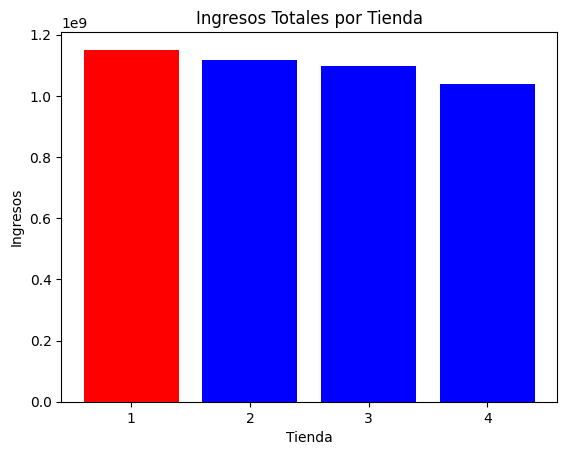

In [18]:
import matplotlib.pyplot as plt

colores = ['blue' if i != '1' else 'red' for i in ingreso_total_por_tienda['tienda_id']]
plt.bar(ingreso_total_por_tienda['tienda_id'], ingreso_total_por_tienda['ingresos'], color = colores)
plt.xlabel('Tienda')
plt.ylabel('Ingresos')
plt.title('Ingresos Totales por Tienda')
plt.show()

### Ventas Totales por Año en cada tienda

In [19]:
df_grouped = df.groupby(['Año', 'tienda_id'])['Precio'].sum().reset_index()
df_grouped

,Año,tienda_id,Precio
0,2020,1,368933200.0
1,2020,2,320466600.0
2,2020,3,321707500.0
3,2020,4,330847700.0
4,2021,1,362120800.0
5,2021,2,351215500.0
6,2021,3,362954400.0
7,2021,4,347823600.0
8,2022,1,316565600.0
9,2022,2,358226500.0


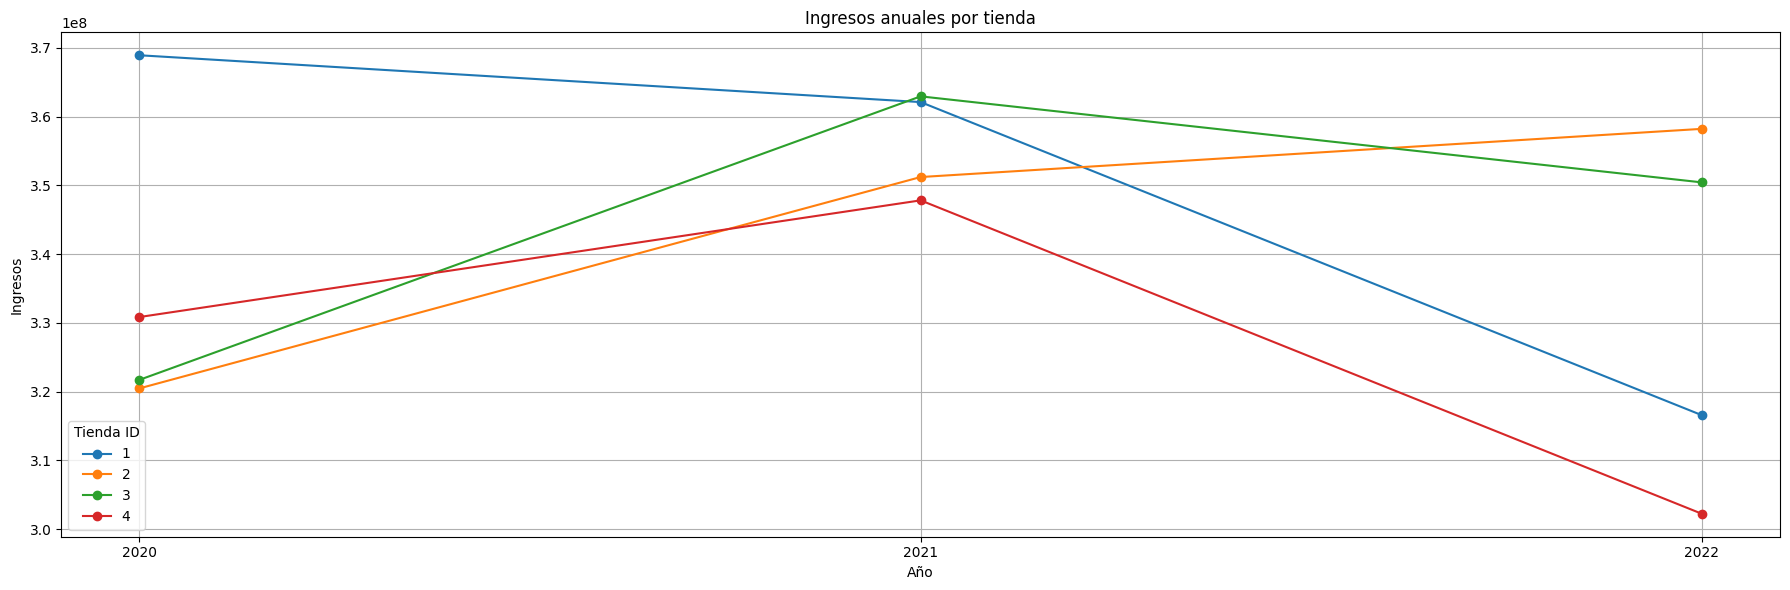

In [20]:
pivot = df_grouped[df_grouped['Año'] != 2023].pivot(index='Año', columns='tienda_id', values='Precio')



fig, ax = plt.subplots(figsize=(18,6))
pivot.plot(marker='o', ax=ax)
ax.set_title('Ingresos anuales por tienda')
ax.set_xlabel('Año')
ax.set_ylabel('Ingresos')
ax.legend(title='Tienda ID')
ax.set_xticks([2020,2021,2022])
ax.grid(True)

plt.tight_layout()
plt.show()


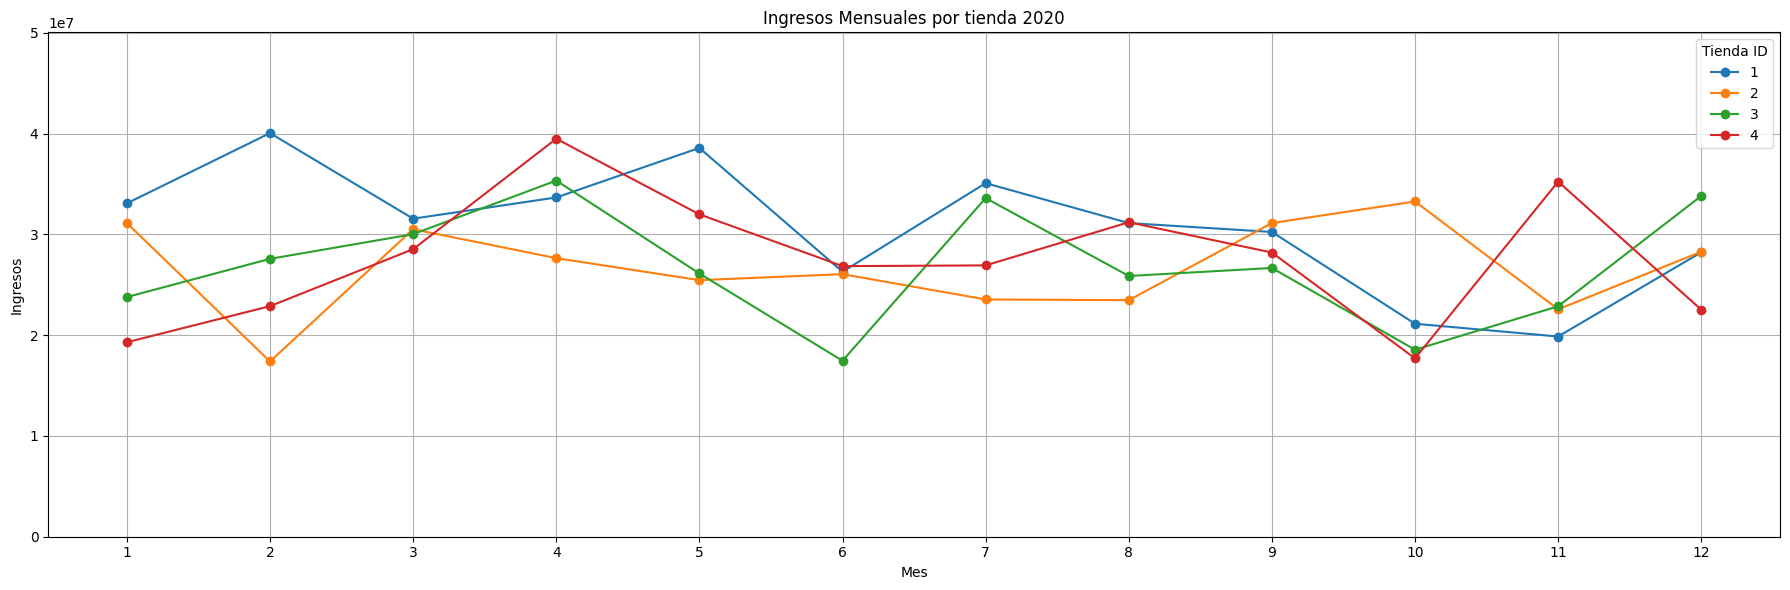

In [21]:
df_grouped2020 = df[df['Año'] == 2020].groupby(['Mes', 'tienda_id'])['Precio'].sum().reset_index()
pivot = df_grouped2020.pivot(index='Mes', columns='tienda_id', values='Precio')

limite_inferior = 0
limite_superior = df_grouped2020['Precio'].max()+10000000



fig, ax = plt.subplots(figsize=(18,6))

pivot.plot(marker='o', ax=ax)

ax.set_title('Ingresos Mensuales por tienda 2020')
ax.set_xlabel('Mes')
ax.set_ylabel('Ingresos')
ax.legend(title='Tienda ID')
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_ylim(limite_inferior, limite_superior)
ax.grid(True)
plt.tight_layout()
plt.show()

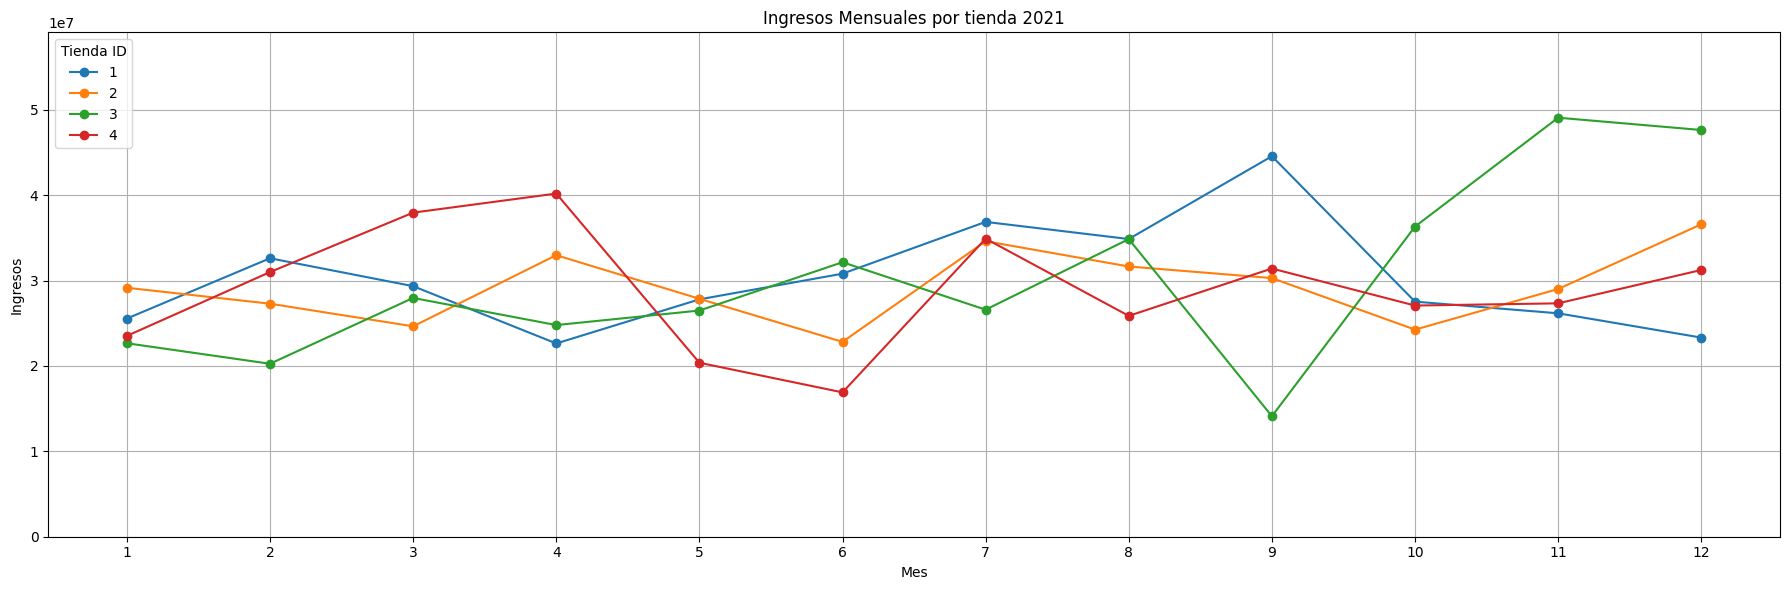

In [22]:
df_grouped2021 = df[df['Año'] == 2021].groupby(['Mes', 'tienda_id'])['Precio'].sum().reset_index()
pivot = df_grouped2021.pivot(index='Mes', columns='tienda_id', values='Precio')

limite_inferior = 0
limite_superior = df_grouped2021['Precio'].max()+10000000


fig, ax = plt.subplots(figsize=(18,6))

pivot.plot(marker='o', ax=ax)

ax.set_title('Ingresos Mensuales por tienda 2021')
ax.set_xlabel('Mes')
ax.set_ylabel('Ingresos')
ax.legend(title='Tienda ID')
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_ylim(limite_inferior, limite_superior)
ax.grid(True)

plt.tight_layout()
plt.show()

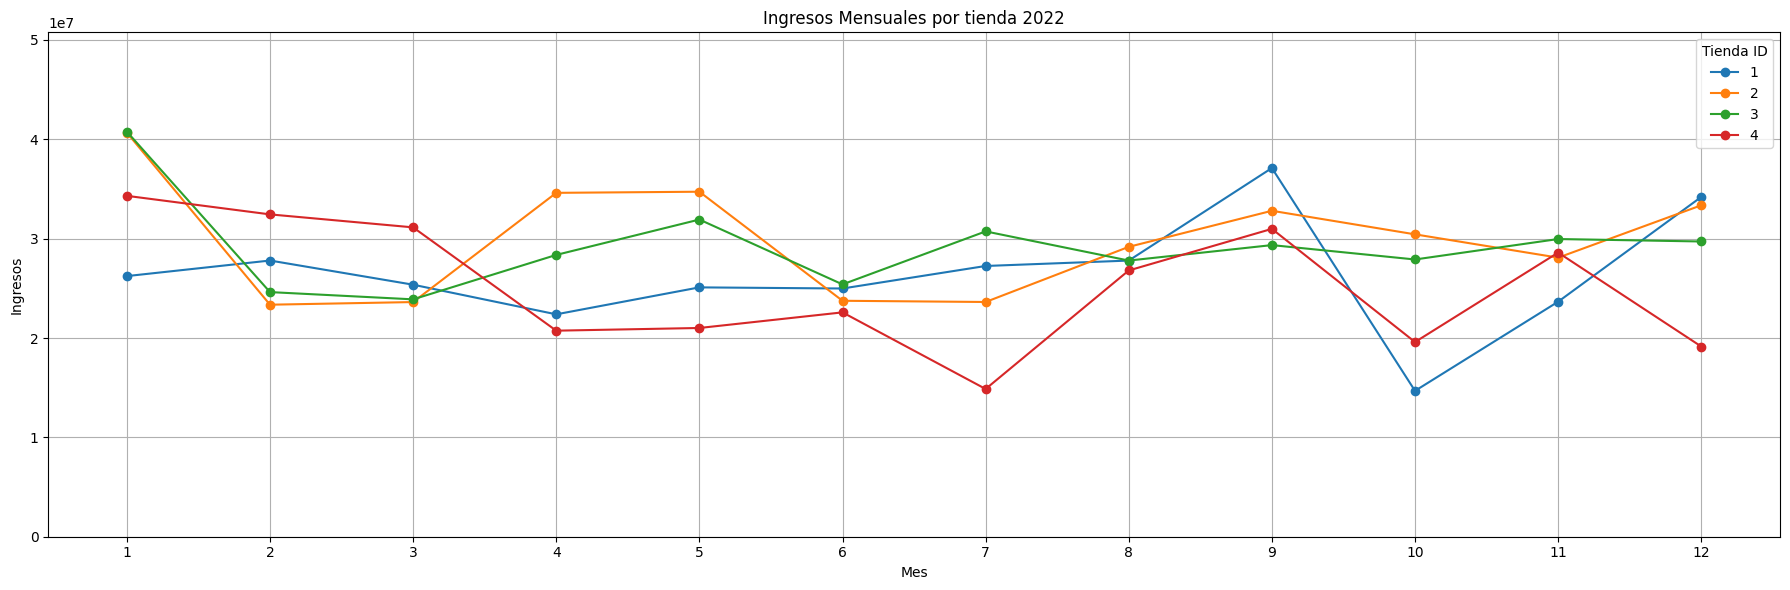

In [23]:
df_grouped2022 = df[df['Año'] == 2022].groupby(['Mes', 'tienda_id'])['Precio'].sum().reset_index()
pivot = df_grouped2022.pivot(index='Mes', columns='tienda_id', values='Precio')

limite_inferior = 0
limite_superior = df_grouped2022['Precio'].max()+10000000

fig, ax = plt.subplots(figsize=(18,6))

pivot.plot(marker='o', ax=ax)

ax.set_title('Ingresos Mensuales por tienda 2022')
ax.set_xlabel('Mes')
ax.set_ylabel('Ingresos')
ax.legend(title='Tienda ID')
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_ylim(limite_inferior, limite_superior)
ax.grid(True)

plt.tight_layout()
plt.show()

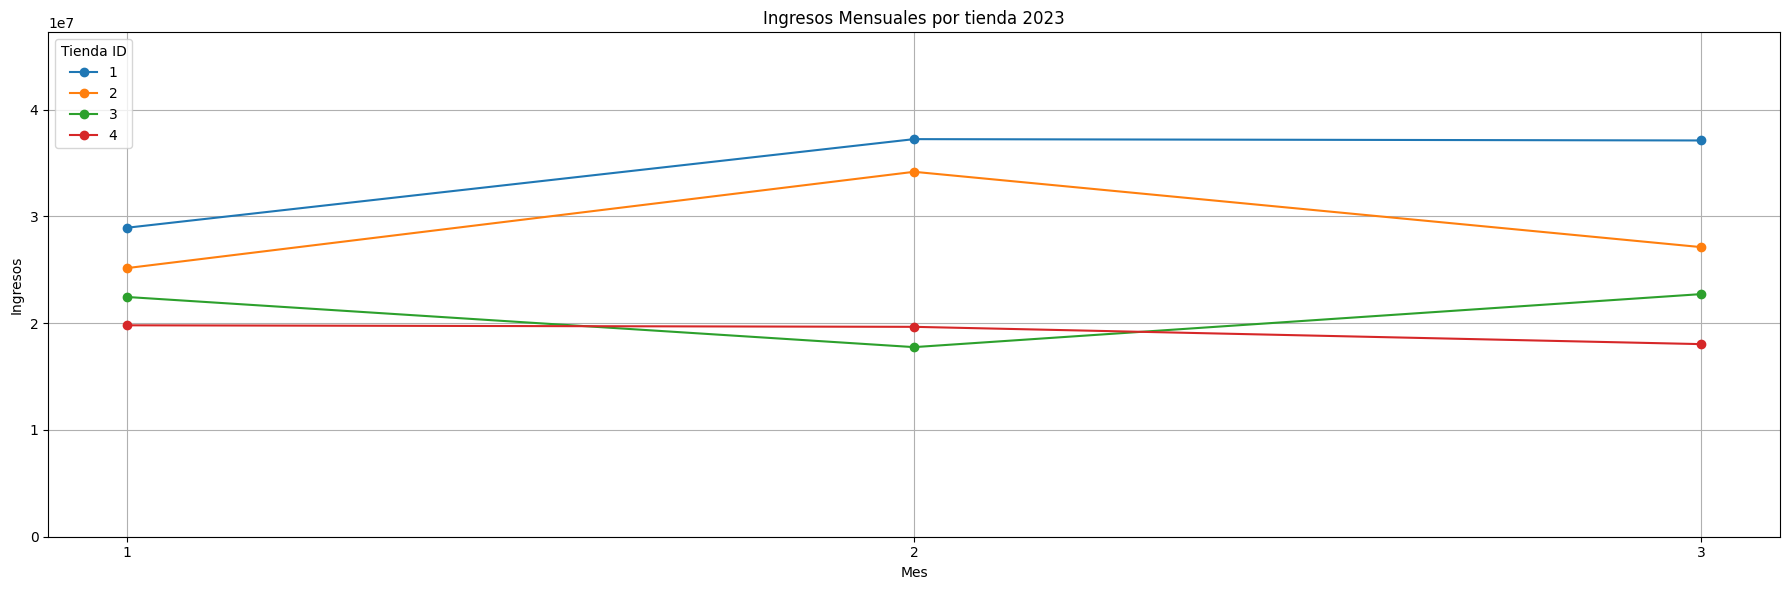

In [24]:
df_grouped2023 = df[df['Año'] == 2023].groupby(['Mes', 'tienda_id'])['Precio'].sum().reset_index()
pivot = df_grouped2023.pivot(index='Mes', columns='tienda_id', values='Precio')

limite_inferior = 0
limite_superior = df_grouped2023['Precio'].max()+10000000

fig, ax = plt.subplots(figsize=(18,6))

pivot.plot(marker='o', ax=ax)

ax.set_title('Ingresos Mensuales por tienda 2023')
ax.set_xlabel('Mes')
ax.set_ylabel('Ingresos')
ax.legend(title='Tienda ID')
ax.set_xticks([1,2,3])
ax.set_ylim(limite_inferior, limite_superior)
ax.grid(True)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [25]:
numero_productos_vendidos_por_categoriaProducto_Tienda1 = df[df['tienda_id']=='1'].groupby('Categoría del Producto').size().sort_values(ascending=False).reset_index(name='Cantidad de productos vendidos')
numero_productos_vendidos_por_categoriaProducto_Tienda1

,Categoría del Producto,Cantidad de productos vendidos
0,Muebles,465
1,Electrónicos,448
2,Juguetes,324
3,Electrodomésticos,312
4,Deportes y diversión,284
5,Instrumentos musicales,182
6,Libros,173
7,Artículos para el hogar,171


In [26]:
numero_productos_vendidos_por_categoriaProducto_Tienda2 = df[df['tienda_id']=='2'].groupby('Categoría del Producto').size().sort_values(ascending=False).reset_index(name='Cantidad de productos vendidos')
numero_productos_vendidos_por_categoriaProducto_Tienda2

,Categoría del Producto,Cantidad de productos vendidos
0,Muebles,442
1,Electrónicos,422
2,Juguetes,313
3,Electrodomésticos,305
4,Deportes y diversión,275
5,Instrumentos musicales,224
6,Libros,197
7,Artículos para el hogar,181


In [27]:
numero_productos_vendidos_por_categoriaProducto_Tienda3 = df[df['tienda_id']=='3'].groupby('Categoría del Producto').size().sort_values(ascending=False).reset_index(name='Cantidad de productos vendidos')
numero_productos_vendidos_por_categoriaProducto_Tienda3

,Categoría del Producto,Cantidad de productos vendidos
0,Muebles,499
1,Electrónicos,451
2,Juguetes,315
3,Electrodomésticos,278
4,Deportes y diversión,277
5,Libros,185
6,Artículos para el hogar,177
7,Instrumentos musicales,177


In [28]:
numero_productos_vendidos_por_categoriaProducto_Tienda4 = df[df['tienda_id']=='4'].groupby('Categoría del Producto').size().sort_values(ascending=False).reset_index(name='Cantidad de productos vendidos')
numero_productos_vendidos_por_categoriaProducto_Tienda4

,Categoría del Producto,Cantidad de productos vendidos
0,Muebles,480
1,Electrónicos,451
2,Juguetes,338
3,Deportes y diversión,277
4,Electrodomésticos,254
5,Artículos para el hogar,201
6,Libros,187
7,Instrumentos musicales,170


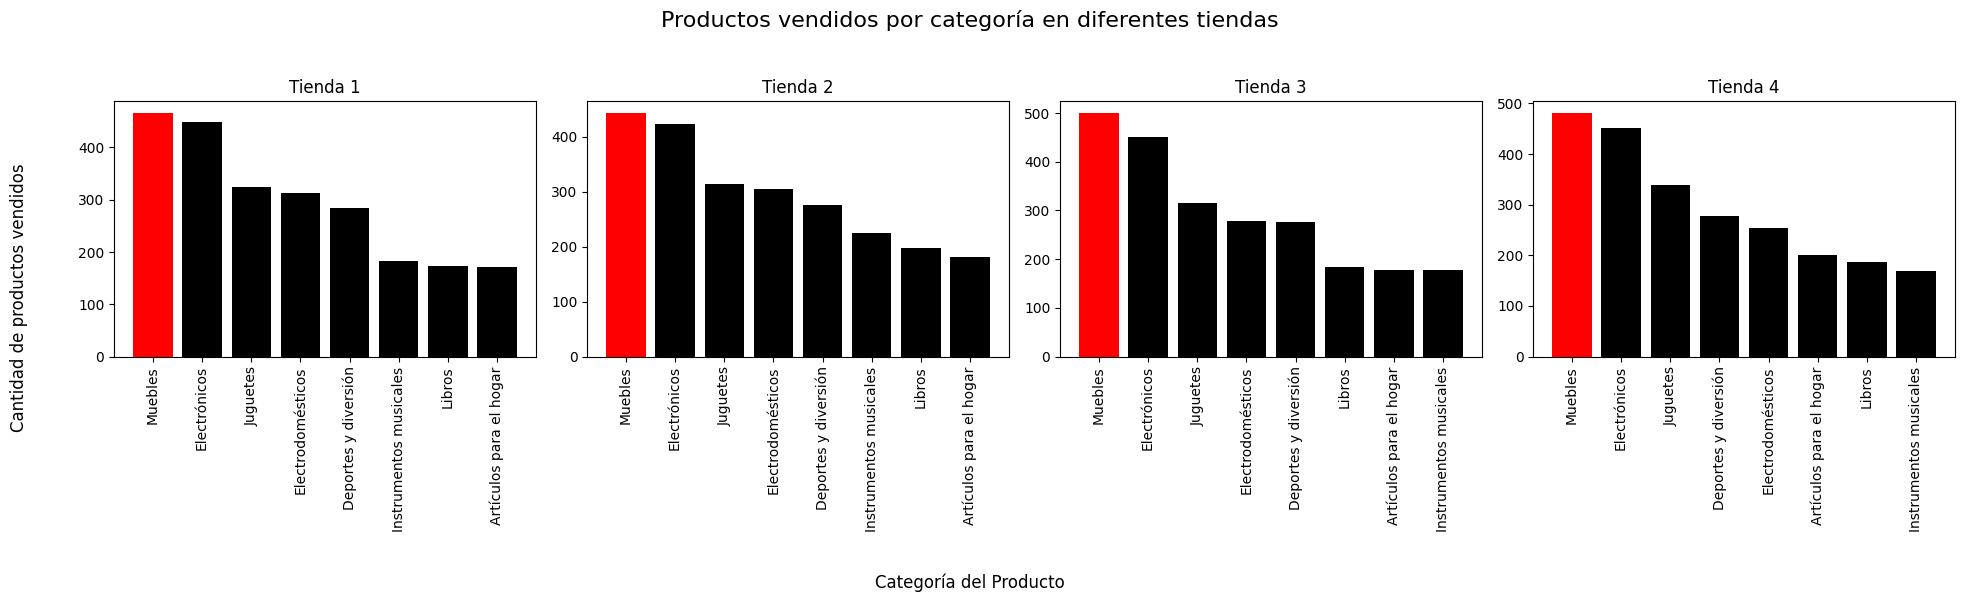

In [29]:
fig, axs = plt.subplots(1, 4, figsize=(20, 6))

colores = ['black' if i != 'Muebles' else 'red' for i in numero_productos_vendidos_por_categoriaProducto_Tienda1['Categoría del Producto']]
axs[0].bar(numero_productos_vendidos_por_categoriaProducto_Tienda1['Categoría del Producto'], numero_productos_vendidos_por_categoriaProducto_Tienda1['Cantidad de productos vendidos'], color = colores)
axs[0].set_title('Tienda 1')
axs[0].tick_params(axis = 'x',rotation=90)


colores = ['black' if i != 'Muebles' else 'red' for i in numero_productos_vendidos_por_categoriaProducto_Tienda2['Categoría del Producto']]
axs[1].bar(numero_productos_vendidos_por_categoriaProducto_Tienda2['Categoría del Producto'], numero_productos_vendidos_por_categoriaProducto_Tienda2['Cantidad de productos vendidos'], color = colores)
axs[1].set_title('Tienda 2')
axs[1].tick_params(axis = 'x',rotation=90)


colores = ['black' if i != 'Muebles' else 'red' for i in numero_productos_vendidos_por_categoriaProducto_Tienda3['Categoría del Producto']]
axs[2].bar(numero_productos_vendidos_por_categoriaProducto_Tienda3['Categoría del Producto'], numero_productos_vendidos_por_categoriaProducto_Tienda3['Cantidad de productos vendidos'], color = colores)
axs[2].set_title('Tienda 3')
axs[2].tick_params(axis = 'x',rotation=90)

colores = ['black' if i != 'Muebles' else 'red' for i in numero_productos_vendidos_por_categoriaProducto_Tienda4['Categoría del Producto']]
axs[3].bar(numero_productos_vendidos_por_categoriaProducto_Tienda4['Categoría del Producto'], numero_productos_vendidos_por_categoriaProducto_Tienda4['Cantidad de productos vendidos'], color = colores)
axs[3].set_title('Tienda 4')
axs[3].tick_params(axis = 'x',rotation=90)

fig.suptitle('Productos vendidos por categoría en diferentes tiendas', fontsize=16)
fig.supxlabel('Categoría del Producto', fontsize=12)
fig.supylabel('Cantidad de productos vendidos', fontsize=12)

plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])  # deja espacio para títulos generales

plt.show()

In [56]:
df.groupby('Categoría del Producto')['Precio'].mean().sort_values(ascending=False).reset_index(name='Precio promedio')

,Categoría del Producto,Precio promedio
0,Electrodomésticos,1.152960e+06
1,Electrónicos,9.371199e+05
2,Instrumentos musicales,4.631774e+05
3,Muebles,4.017291e+05
4,Deportes y diversión,1.284615e+05
5,Artículos para el hogar,7.887644e+04
6,Juguetes,5.705767e+04
7,Libros,5.080337e+04


# 3. Calificación promedio de la tienda


Como dato curioso la tienda que más ingresos reporto es la tienda 1, pero como vemos no es la mejor calificada por los consumidores, aunque no es que exista mucha diferencia, pero muestra que existe ciertas críticas que no la favorecen, y otro aspecto a notar es que la tienda 4 es la que genero menos ingresos y tampoco género buenas calificaciones.

In [30]:
calificacion_promedio_por_tienda = df.groupby('tienda_id')['Calificación'].mean().round(2).sort_values(ascending=False).reset_index(name='Calificación promedio')
calificacion_promedio_por_tienda

,tienda_id,Calificación promedio
0,3,4.05
1,2,4.04
2,4,4.00
3,1,3.98


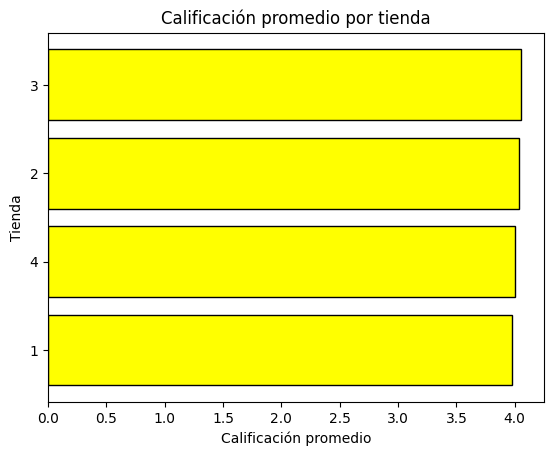

In [31]:
plt.barh(calificacion_promedio_por_tienda['tienda_id'], calificacion_promedio_por_tienda['Calificación promedio'], color = 'yellow', edgecolor = 'black')
plt.xlabel('Calificación promedio')
plt.ylabel('Tienda')
plt.title('Calificación promedio por tienda')
plt.gca().invert_yaxis()

plt.show()

# 4. Productos más y menos vendidos

In [59]:
# Producto más vendido
print("Producto más vendido en la tienda 1:")
mas_vendido = df[df['tienda_id'] == '1'].groupby('Producto').size().sort_values(ascending=False).reset_index(name='cantidad').head(1)
print(mas_vendido.to_string(index=False))

# Producto menos vendido
print("\nProducto menos vendido en la tienda 1:")
menos_vendido = df[df['tienda_id'] == '1'].groupby('Producto').size().sort_values(ascending=True).reset_index(name='cantidad').head(1)
print(menos_vendido.to_string(index=False))


Producto más vendido en la tienda 1:
Producto  cantidad
 Armario        60

Producto menos vendido en la tienda 1:
                 Producto  cantidad
Auriculares con micrófono        33


In [33]:
# Producto más vendido
print("Producto más vendido en la tienda 2:")
mas_vendido = df[df['tienda_id'] == '2'].groupby('Producto').size().sort_values(ascending=False).reset_index(name='cantidad').head(1)
print(mas_vendido.to_string(index=False))

# Producto menos vendido
print("\nProducto menos vendido en la tienda 2:")
menos_vendido = df[df['tienda_id'] == '2'].groupby('Producto').size().sort_values(ascending=True).reset_index(name='cantidad').head(1)
print(menos_vendido.to_string(index=False))


Producto más vendido en la tienda 2:
                 Producto  cantidad
Iniciando en programación        65

Producto menos vendido en la tienda 2:
     Producto  cantidad
Juego de mesa        32


In [34]:
# Producto más vendido
print("Producto más vendido en la tienda 3:")
mas_vendido = df[df['tienda_id'] == '3'].groupby('Producto').size().sort_values(ascending=False).reset_index(name='cantidad').head(1)
print(mas_vendido.to_string(index=False))

# Producto menos vendido
print("\nProducto menos vendido en la tienda 3:")
menos_vendido = df[df['tienda_id'] == '3'].groupby('Producto').size().sort_values(ascending=True).reset_index(name='cantidad').head(1)
print(menos_vendido.to_string(index=False))


Producto más vendido en la tienda 3:
     Producto  cantidad
Kit de bancas        57

Producto menos vendido en la tienda 3:
               Producto  cantidad
Bloques de construcción        35


In [35]:
# Producto más vendido
print("Producto más vendido en la tienda 4:")
mas_vendido = df[df['tienda_id'] == '4'].groupby('Producto').size().sort_values(ascending=False).reset_index(name='cantidad').head(1)
print(mas_vendido.to_string(index=False))

# Producto menos vendido
print("\nProducto menos vendido en la tienda 4:")
menos_vendido = df[df['tienda_id'] == '4'].groupby('Producto').size().sort_values(ascending=True).reset_index(name='cantidad').head(1)
print(menos_vendido.to_string(index=False))


Producto más vendido en la tienda 4:
Producto  cantidad
Cama box        62

Producto menos vendido en la tienda 4:
          Producto  cantidad
Guitarra eléctrica        33


# 5. Envío promedio por tienda

Como podemos observar, la tienda que tiene mayores costos de envío es la número 1, y la que menos tiene es la número 4, además cabe decir que existe un rango de aproximadamente 3000 entre costos de envío en las tiendas, por lo cual es significativo.

In [36]:
costodeEnvio_promedio_por_tienda  =df.groupby('tienda_id')['Costo de envío'].mean().round(0).sort_values(ascending=False).reset_index()
costodeEnvio_promedio_por_tienda

,tienda_id,Costo de envío
0,1,26019.0
1,2,25216.0
2,3,24806.0
3,4,23459.0


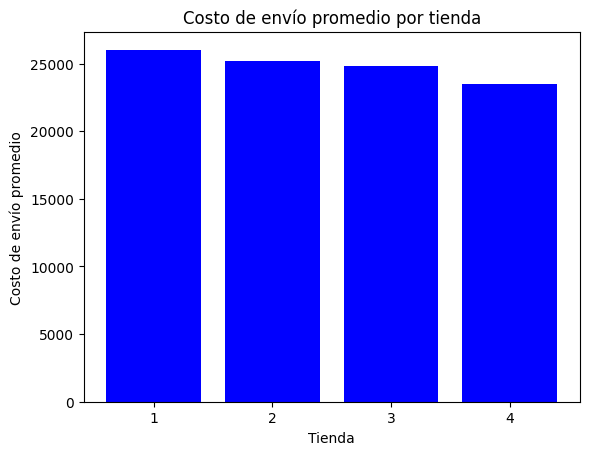

In [46]:
plt.bar(costodeEnvio_promedio_por_tienda['tienda_id'], costodeEnvio_promedio_por_tienda['Costo de envío'], color = 'Blue')
plt.xlabel('Tienda')
plt.ylabel('Costo de envío promedio')
plt.title('Costo de envío promedio por tienda')

plt.show()

In [60]:
df.groupby('Lugar de Compra')['Costo de envío'].mean().round(0).sort_values(ascending=False).reset_index()

,Lugar de Compra,Costo de envío
0,Soacha,34768.0
1,Inírida,30557.0
2,Cúcuta,28597.0
3,Pasto,27801.0
4,Neiva,27710.0
5,Bucaramanga,26790.0
6,Cali,26727.0
7,Leticia,25318.0
8,Medellín,25282.0
9,Villavicencio,25100.0


# 6. Distribución de los métodos de pago en las tiendas

Como podemos observar la tendencia indica que la mayoría de los pagos hacia las tiendas se realizan con tarjeta de crédito a lo cual con base en esto podemos generar estrategias para potenciar más otros métodos de pago o mejorar el de tarjeta de crédito, además vamos a revisar si esta tendencia se maneja en general o solo en ciertas tiendas

In [38]:
metodo_de_pago_por_tienda = df.groupby('Método de pago').size().sort_values(ascending=False).reset_index(name='Cantidad de pagos')
metodo_de_pago_por_tienda

,Método de pago,Cantidad de pagos
0,Tarjeta de crédito,6898
1,Nequi,1900
2,Cupón,504
3,Tarjeta de débito,133


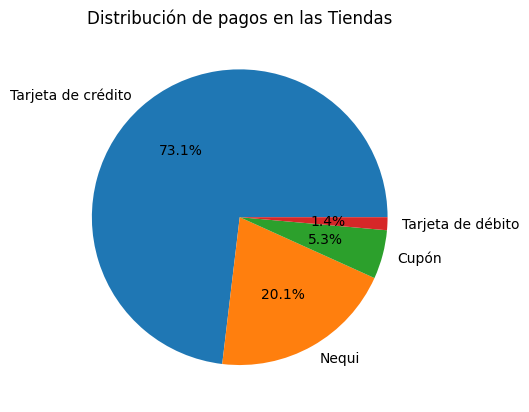

In [39]:
plt.pie(metodo_de_pago_por_tienda['Cantidad de pagos'], labels=metodo_de_pago_por_tienda['Método de pago'], autopct='%1.1f%%')
plt.title('Distribución de pagos en las Tiendas')
plt.show()

In [64]:
df.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'tienda_id',
       'Mes', 'Año', 'Mes_Nombre', 'mes_año'],
      dtype='object')

In [65]:
df.groupby('Cantidad de cuotas')['Método de pago'].value_counts()

Cantidad de cuotas  Método de pago    
1                   Tarjeta de crédito    2234
                    Nequi                 1900
                    Cupón                  504
                    Tarjeta de débito      133
2                   Tarjeta de crédito    1087
3                   Tarjeta de crédito     918
4                   Tarjeta de crédito     623
5                   Tarjeta de crédito     492
6                   Tarjeta de crédito     360
7                   Tarjeta de crédito     158
8                   Tarjeta de crédito     361
9                   Tarjeta de crédito      46
10                  Tarjeta de crédito     573
11                  Tarjeta de crédito       4
12                  Tarjeta de crédito      22
14                  Tarjeta de crédito       4
15                  Tarjeta de crédito       4
17                  Tarjeta de crédito       1
18                  Tarjeta de crédito       2
20                  Tarjeta de crédito       4
21                  Tarjeta de crédito       2
24                  Tarjeta de crédito       3
Name: count, dtype: int64

In [40]:
df[df['tienda_id'] == '1'].groupby('Método de pago').size().sort_values(ascending=False).reset_index(name='Cantidad de pagos')

,Método de pago,Cantidad de pagos
0,Tarjeta de crédito,1704
1,Nequi,483
2,Cupón,137
3,Tarjeta de débito,35


In [41]:
df[df['tienda_id'] == '2'].groupby('Método de pago').size().sort_values(ascending=False).reset_index(name='Cantidad de pagos')

,Método de pago,Cantidad de pagos
0,Tarjeta de crédito,1721
1,Nequi,467
2,Cupón,141
3,Tarjeta de débito,30


In [42]:
df[df['tienda_id'] == '3'].groupby('Método de pago').size().sort_values(ascending=False).reset_index(name='Cantidad de pagos')

,Método de pago,Cantidad de pagos
0,Tarjeta de crédito,1753
1,Nequi,468
2,Cupón,101
3,Tarjeta de débito,37


In [43]:
df[df['tienda_id'] == '4'].groupby('Método de pago').size().sort_values(ascending=False).reset_index(name='Cantidad de pagos')

,Método de pago,Cantidad de pagos
0,Tarjeta de crédito,1720
1,Nequi,482
2,Cupón,125
3,Tarjeta de débito,31


# 7.  Distribución de ventas por lugar de venta

Como podemos observar, las principales ciudades que más generan ventas son Bogotá, Medellín, cali y Pereira, a lo cual podemos crear estrategias para expandirnos a otras ciudades o mejorar aún más en las que ya estamos bien establecidos, se recomienda ejecutar este codigo en colab para que sean visibles ya que en github no se viualizan.

In [44]:
import plotly.express as px
df_mapa = df.groupby(['lat', 'lon', 'Lugar de Compra'], as_index=False)['Precio'].sum()
fig = px.scatter_geo(df_mapa,
                     lat='lat',
                     lon='lon',
                     size='Precio',
                     color='Precio',
                     scope='south america',
                     title='Ingresos por ubicación en Colombia',
                     hover_name='Lugar de Compra',
                     projection='natural earth')

# Rango aproximado para Colombia
fig.update_layout(geo=dict(
    lataxis_range=[-5, 15],
    lonaxis_range=[-80, -65]
))

fig.show()

In [69]:
df_mapa = df[df['Año']==2020].groupby(['lat', 'lon', 'Lugar de Compra'], as_index=False)['Precio'].sum()
fig = px.scatter_geo(df_mapa,
                     lat='lat',
                     lon='lon',
                     size='Precio',
                     color='Precio',
                     scope='south america',
                     title='Ingresos por ubicación en Colombia 2020',
                     hover_name='Lugar de Compra',
                     projection='natural earth')

# Rango aproximado para Colombia
fig.update_layout(geo=dict(
    lataxis_range=[-5, 15],
    lonaxis_range=[-80, -65]
))

fig.show()

In [70]:
df_mapa = df[df['Año']==2021].groupby(['lat', 'lon', 'Lugar de Compra'], as_index=False)['Precio'].sum()
fig = px.scatter_geo(df_mapa,
                     lat='lat',
                     lon='lon',
                     size='Precio',
                     color='Precio',
                     scope='south america',
                     title='Ingresos por ubicación en Colombia 2021',
                     hover_name='Lugar de Compra',
                     projection='natural earth')

# Rango aproximado para Colombia
fig.update_layout(geo=dict(
    lataxis_range=[-5, 15],
    lonaxis_range=[-80, -65]
))

fig.show()

In [71]:
df_mapa = df[df['Año']==2022].groupby(['lat', 'lon', 'Lugar de Compra'], as_index=False)['Precio'].sum()
fig = px.scatter_geo(df_mapa,
                     lat='lat',
                     lon='lon',
                     size='Precio',
                     color='Precio',
                     scope='south america',
                     title='Ingresos por ubicación en Colombia 2022',
                     hover_name='Lugar de Compra',
                     projection='natural earth')

# Rango aproximado para Colombia
fig.update_layout(geo=dict(
    lataxis_range=[-5, 15],
    lonaxis_range=[-80, -65]
))

fig.show()

In [72]:
df_mapa = df[df['Año']==2023].groupby(['lat', 'lon', 'Lugar de Compra'], as_index=False)['Precio'].sum()
fig = px.scatter_geo(df_mapa,
                     lat='lat',
                     lon='lon',
                     size='Precio',
                     color='Precio',
                     scope='south america',
                     title='Ingresos por ubicación en Colombia',
                     hover_name='Lugar de Compra',
                     projection='natural earth')

# Rango aproximado para Colombia
fig.update_layout(geo=dict(
    lataxis_range=[-5, 15],
    lonaxis_range=[-80, -65]
))

fig.show()

###Finalmente para realizar una comprobación rápida
Como se observa tenemos 19 ciudades y tenemos 4 tiendas a lo cual que si realizamos los cálculos nos debería dar 76 registros, a lo cual pudimos confirmar que cada una de las 4 tiendas tiene una sucursal en cada una de las ciudades, quería observar si existía un patrón con ciertas tiendas con sucursales en ciertos lugares, pero resulto no ser el caso, además de recalcar que el dataset es bastante similar y balanceado para las 4 tiendas.

In [51]:
df['Lugar de Compra'].value_counts()

,count
Lugar de Compra,
Bogotá,3943
Medellín,2314
Cali,1007
Pereira,517
Barranquilla,310
Cartagena,242
Cúcuta,186
Bucaramanga,181
Riohacha,163


In [55]:
df.groupby(['tienda_id', 'Lugar de Compra']).size().sort_values(ascending=False).reset_index(name='Cantidad de ventas')

,tienda_id,Lugar de Compra,Cantidad de ventas
0,4,Bogotá,991
1,2,Bogotá,985
2,1,Bogotá,984
3,3,Bogotá,983
4,2,Medellín,594
...,...,...,...
71,1,Valledupar,3
72,4,Armenia,3
73,3,Valledupar,3
74,4,Inírida,3


# Reporte Final

# Informe de Análisis de Desempeño - Cadenas Alura Store  
**Responsable:** Equipo de Análisis Estratégico  
**Análisis entregado por:** Luis Carlos Castiblanco
**Fecha:** 22-04-2025

**Linkedink**: https://www.linkedin.com/in/luiscarlos17009/


---

## Objetivo del análisis

Este informe tiene como propósito apoyar al Sr. Juan, propietario de la cadena Alura Store, en su decisión estratégica de vender una de sus cuatro tiendas actuales con el fin de iniciar un nuevo emprendimiento. Para ello, se realizó un análisis detallado basado en los datos históricos de ventas, categorías de productos, calificaciones, envíos y métodos de pago correspondientes a los años 2020 a 2023 (siendo este último solo hasta el mes de marzo).

---

## Metodología

El análisis se llevó a cabo utilizando herramientas de análisis de datos como Pandas, Matplotlib y plotly, sobre un conjunto de datos con registros de ventas, productos, envíos y evaluaciones por tienda. Se generaron nuevas variables para enriquecer el análisis y se verificó la integridad y consistencia de los datos. Se destaca que:

- No se encontraron datos nulos.
- La cantidad de registros por tienda es similar (2359 registros), salvo la tienda 4, que cuenta con un registro menos.
- No se identificaron valores atípicos significativos.

---

## Resultados del Análisis

### 1. Ingresos Totales por Tienda
- La tienda **1** fue la que generó mayores ingresos (1.15B).
- La tienda **4** obtuvo el menor ingreso total (1.03B).
- Esta diferencia, aunque no abismal, es consistente con otros indicadores que muestran un rendimiento menor de la tienda 4.

### 2. Tendencia de Ventas Anual
- En **2020**, la tienda 1 superó ampliamente al resto en ventas.
- En **2021**, las ventas se estabilizaron y fueron relativamente similares entre las tiendas.
- En **2022**, tanto la tienda 1 como la tienda 4 mostraron una caída abrupta en sus volúmenes de ventas, lo cual debe ser monitoreado.
- En el primer trimestre de **2023**, la tienda 4 se mantiene como la de peor rendimiento en ingresos.

### 3. Análisis por Categoría de Producto
- Las categorías más vendidas fueron similares entre tiendas, destacándose **muebles** como la categoría líder.
- Sin embargo, la tienda 4 presenta una diferencia en su enfoque: en lugar de vender electrodomésticos (de mayor precio promedio), vende más productos de la categoría **Deportes y diversión**, con menor valor promedio. Esto podría explicar en parte sus menores ingresos.

### 4. Calificaciones de los Clientes
- Las valoraciones promedio se mantuvieron alrededor de **4.0** en todas las tiendas.
- La tienda 1 fue la única que bajó ligeramente de este valor (3.98), pero la diferencia no es significativa.

### 5. Costos de Envío
- La tienda 1 presenta el **costo de envío promedio más alto**, posiblemente por operar en zonas más alejadas o con mayores tarifas logísticas.
- La tienda 4 tiene el **costo de envío promedio más bajo**, lo que sugiere que su localización es más favorable desde el punto de vista logístico.

### 6. Métodos de Pago
- El **73.1%** de los pagos se realizan con tarjeta de crédito, patrón consistente en todas las tiendas. Esto representa una oportunidad para explorar campañas bancarias conjuntas o nuevos métodos de pago que fomenten aún más la compra a crédito.

### 7. Distribución Geográfica
- Las tiendas tienen presencia uniforme en 19 ciudades. No se identificaron diferencias significativas en la cobertura geográfica de cada tienda.
- Las ciudades con mayores ventas fueron **Bogotá, Medellín, Cali y Pereira**, manteniéndose constantes a lo largo del tiempo.

---

## Conclusión y Recomendación Final

Tras el análisis detallado de todos los indicadores evaluados, se concluye que **la tienda número 4** presenta el rendimiento **más bajo** dentro de la cadena Alura Store. Los factores que sustentan esta recomendación incluyen:

- Consistentes menores ingresos anuales durante los últimos dos años(2021,2022) completos y el primer trimestre del año 2023.
- Un enfoque comercial menos rentable, con mayor proporción de ventas en categorías de menor precio promedio.
- Aunque tiene una logística más económica y buenas valoraciones, estos aspectos no compensan el bajo nivel de ingresos.

**Recomendación:**  
Se recomienda al Sr. Juan considerar la **venta de la tienda número 4**, ya que representa la unidad con menor eficiencia económica relativa. Esta decisión está respaldada por datos consistentes y objetivos, alineándose con su intención de liberar capital para un nuevo emprendimiento.
